# SNLP Assignment 1

Name 1: Rayyan Mohammad Minhaj <br>
Student id 1: 7074982 <br>
Email 1: rami00002@stud.uni-saarland.de <br>


Name 2: Abdullah Abdul Wahid <br>
Student id 2: 7075730 <br>
Email 2: abyy00002@stud.uni-saarland.de <br>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

**NOTE**: For this specific exercise, you are not allowed to import any libraries other than the ones already specified in the next cell


In [35]:
import string
import matplotlib.pyplot as plt


## Exercise 1.3: Python Basics [0.5 + 0.5 + 0.5 + 0.5 = 2 pts]

In this exercise, you will familiarise yourself with the fundamentals of Natural Language Processing (NLP), especially some important and relevant operations in Python. You are given a small text corpus in the file `data.txt`. Your task is the following:
1. Load the text from the file.  [0.5 pts]
2. Perfrom basic text pre-processing on the text to remove punctuations and other non-important symbols, also lowercase everything. [0.5 pts]
3. Report statistics such as: number of words (unigrams), number of bigrams, number of trigrams. [0.5 pts]
4. Plot separate histograms to show the distribution of the unigrams, bigrams and trigrams.      [0.5 pts]

In [36]:
def load_text(filepath='data.txt'):
    """
    Load text from a file.

    Args:
        filepath (str): Path to the file to be loaded.

    Returns:
        str: The content of the file as a string.
    """
    with open(filepath, 'r', encoding='utf-8') as f:
            return f.read()

def preprocess(text):
    """
    Preprocess the input text by lowercasing and removing punctuation.

    Args:
        text (str): The input text to preprocess.

    Returns:
        list: A list of tokens (words) after preprocessing.
    """
    text = text.lower()
    cleaned_text = ''.join(char for char in text if char not in string.punctuation)
    tokens = cleaned_text.split()
    return tokens

def analyse(tokens):
    """
    Analyze the tokens to compute unigrams, bigrams, and trigrams, and their frequencies.

    Args:
        tokens (list): A list of tokens (words).

    Returns:
        tuple: A tuple containing frequency dictionaries for unigrams, bigrams, and trigrams.
    """
    unigram_frequencies = {}
    for token in tokens:
        unigram_frequencies[token] = unigram_frequencies.get(token, 0) + 1

    bigram_frequencies = {}
    for i in range(len(tokens) - 1):
        bigram = (tokens[i], tokens[i+1])
        bigram_frequencies[bigram] = bigram_frequencies.get(bigram, 0) + 1

    trigram_frequencies = {}
    for i in range(len(tokens) - 2):
        trigram = (tokens[i], tokens[i+1], tokens[i+2])
        trigram_frequencies[trigram] = trigram_frequencies.get(trigram, 0) + 1

    return unigram_frequencies, bigram_frequencies, trigram_frequencies

def hist_plot(freq_dict, title="Histogram"):
    """
    Plot a histogram for the given frequency dictionary.

    Args:
        freq_dict (dict): A dictionary containing items and their frequencies.
        title (str): The title of the histogram.
    """
    # Sort the dictionary by value in descending order and display only top 50 frequencies for good plot visibility
    sorted_items = sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)[:50]
    items = [str(item[0]) for item in sorted_items]
    counts = [item[1] for item in sorted_items]

    plt.figure(figsize=(12, 6))
    plt.bar(items, counts)
    plt.xlabel("Items")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

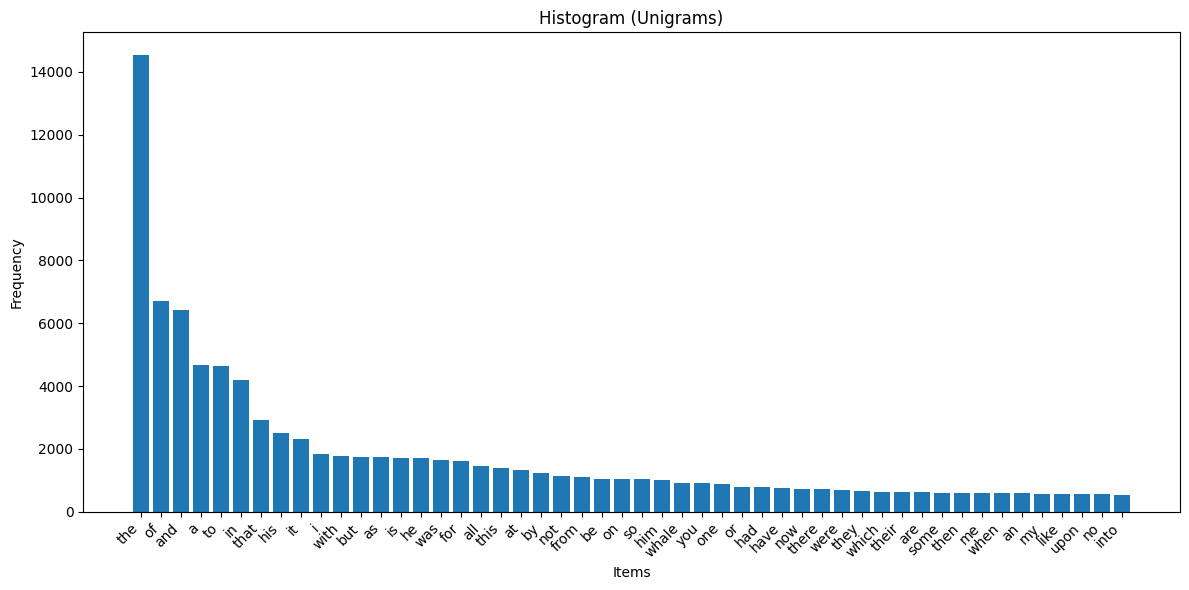

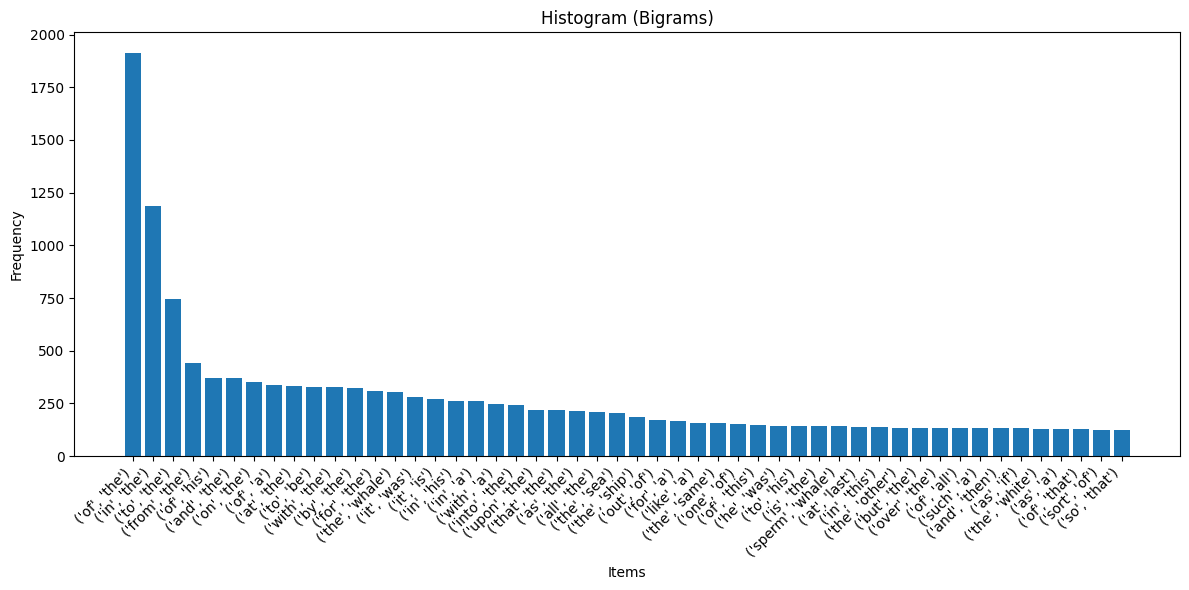

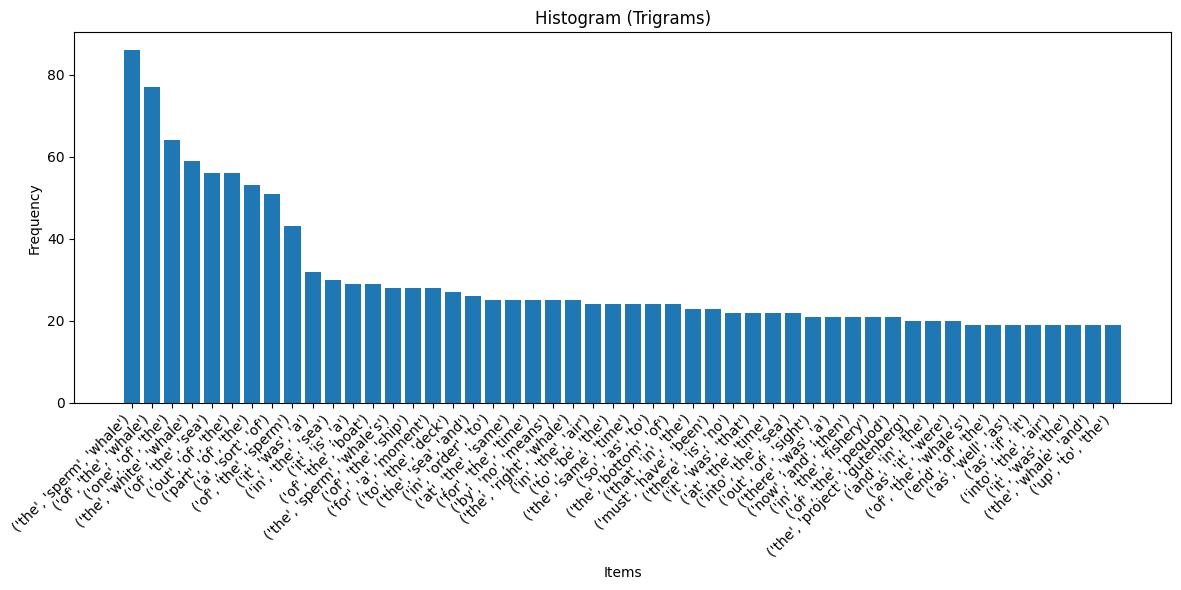

In [37]:
## Driver Code

data = load_text(filepath='data/moby_dick.txt')
data_prepossed = preprocess(data)
unigrams, bigrams, trigrams = analyse(data_prepossed)
hist_plot(unigrams, title="Histogram (Unigrams)")
hist_plot(bigrams, title="Histogram (Bigrams)")
hist_plot(trigrams, title="Histogram (Trigrams)")

## Exercise 1.4: Zipf's and Mandelbrot's Law [2 + 0.5 + 0.5 + 0.5 + 0.5 = 4 pts]
You are given the subfolder `data`, which contains 4 files:
- `cities_eng.txt` contains the text of "A Tale of 2 Cities" by Charles Dickens (source: https://www.gutenberg.org/ebooks/98).
- `cities_ger.txt` contains the translation of "A Tale of 2 Cities" by Charles Dickens into German (source:https://www.gutenberg.org/ebooks/58145).
- `parser.cpp` contains the C++ code fpr Mozilla’s SpiderMonkey Parser (source: https://github.com/mozilla/gecko-dev/blob/master/js/src/frontend/Parser.cpp).
- `uniprot_sprot.fasta` contains sequences of amino acids, forming proteins (source: https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.fasta.gz). If you are interested, you can look up the meaning of the letters inside the file here: https://en.wikipedia.org/wiki/Protein_sequence.

You are free to use the functions defined in Exercise 1.3 as needed to perform the following tasks:

1. Count the number of unigrams, and then rank the words, such that highest frequency has rank 1 and so on. For each of the words, plot the frequency against the rank. Use a plot with linear axes.                                                      [2 pts]

In [38]:
def get_freq_ranks(tokens):
    """
    Compute the frequency and rank of tokens.

    Args:
        tokens (list): A list of tokens (words).

    Returns:
        tuple: A tuple containing frequencies, ranks, and the frequency dictionary.
    """
    freq_dict = {}
    for token in tokens:
        freq_dict[token] = freq_dict.get(token, 0) + 1

    sorted_freq_items = sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)
    sorted_freqs = [item[1] for item in sorted_freq_items]
    ranks = list(range(1, len(sorted_freqs) + 1))
    return sorted_freqs, ranks, freq_dict

def plot_zipf_linear(freqs, ranks, title):
    """
    Plot a Zipf plot with linear axes.

    Args:
        freqs (list): A list of frequencies.
        ranks (list): A list of ranks.
        title (str): The title of the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.plot(ranks, freqs, marker='.')
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

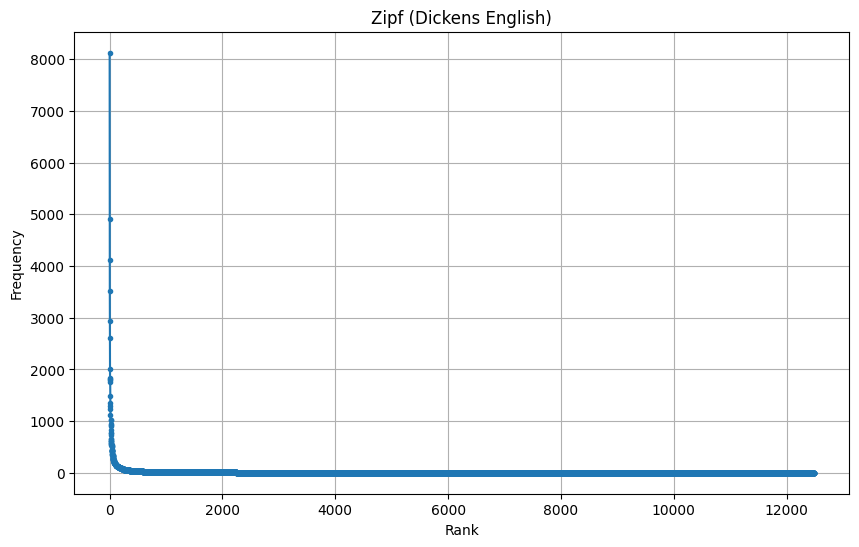

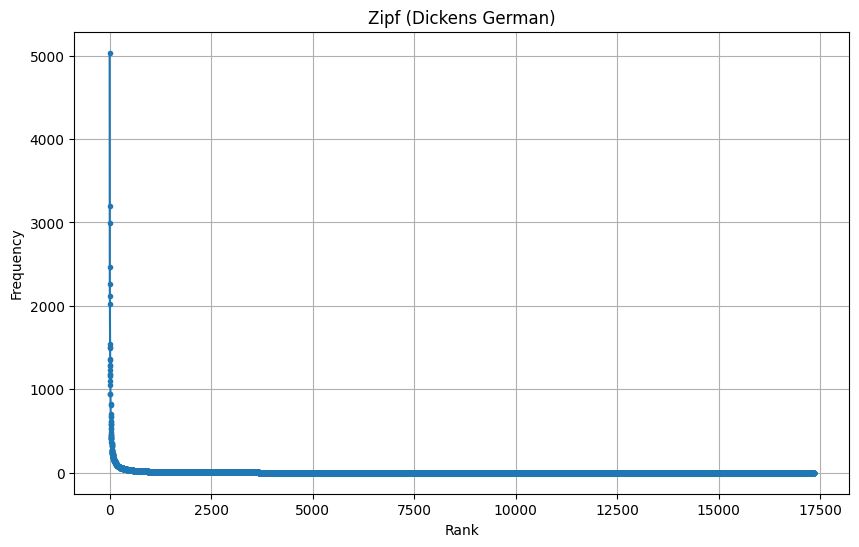

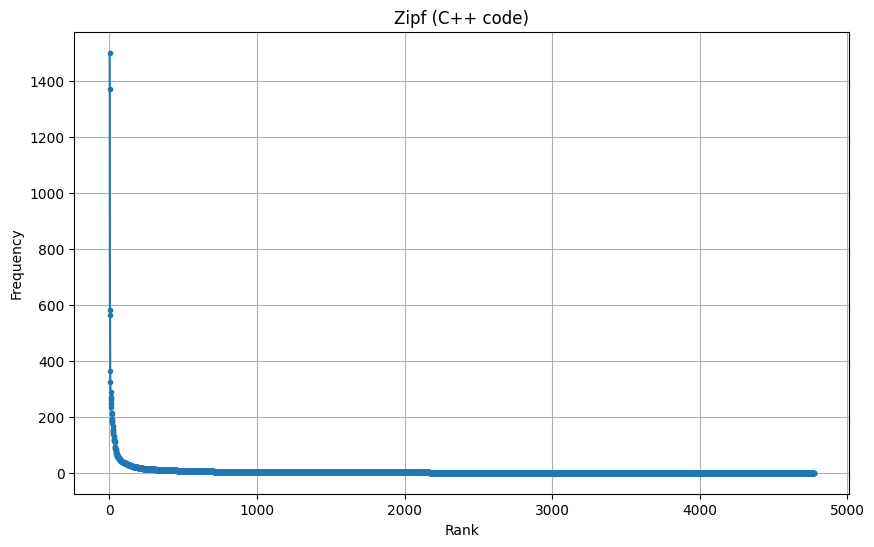

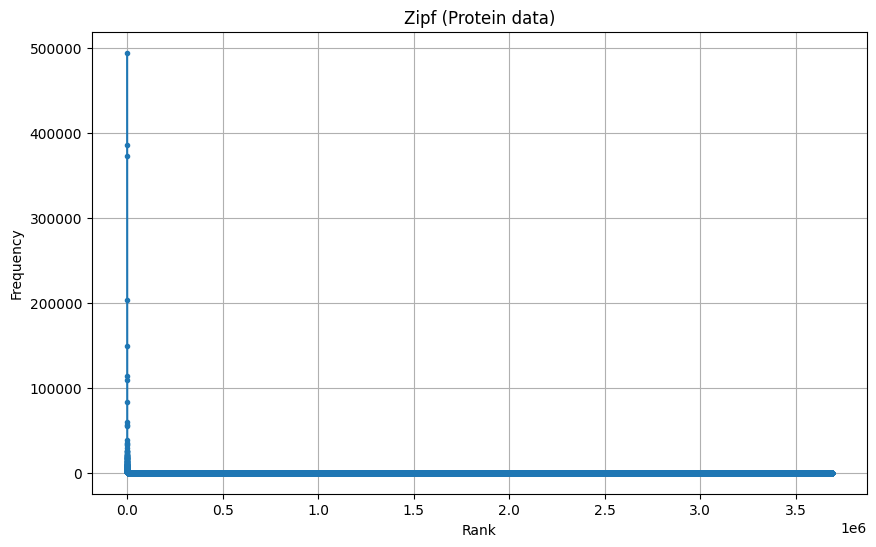

In [39]:
## Driver Code

## Dickens English
data_eng = load_text(filepath='data/cities_eng.txt')
data_eng_prepossed = preprocess(data_eng)
freqs_eng, ranks_eng, freq_dict_eng = get_freq_ranks(data_eng_prepossed)
zipf_eng = plot_zipf_linear(freqs_eng, ranks_eng, "Zipf (Dickens English)")

## Dickens German
data_ger = load_text(filepath='data/cities_ger.txt')
data_ger_prepossed = preprocess(data_ger)
freqs_ger, ranks_ger, freq_dict_ger = get_freq_ranks(data_ger_prepossed)
zipf_ger = plot_zipf_linear(freqs_ger, ranks_ger, "Zipf (Dickens German)")

## C++ code
data_py = load_text(filepath='data/parser.cpp')
data_py_prepossed = preprocess(data_py)
freqs_py, ranks_py, freq_dict_py = get_freq_ranks(data_py_prepossed)
zipf_py = plot_zipf_linear(freqs_py, ranks_py, "Zipf (C++ code)")

## Protein data
data_pt = load_text(filepath='data/uniprot_sprot.fasta')
data_pt_prepossed = preprocess(data_pt)
freqs_pt, ranks_pt, freq_dict_pt = get_freq_ranks(data_pt_prepossed)
zipf_pt = plot_zipf_linear(freqs_pt, ranks_pt, "Zipf (Protein data)")

2. Repeat the experiment, but change the plot to use a log scale instead of linear. [0.5 pts]

In [40]:
def plot_zipf_log(freqs, ranks, title):
    """
    Plot a Zipf plot with logarithmic axes.
    Args:
        freqs (list): A list of frequencies.
        ranks (list): A list of ranks.
        title (str): The title of the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.loglog(ranks, freqs, marker='.')
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.grid(True, which="both", ls="-")
    plt.show()

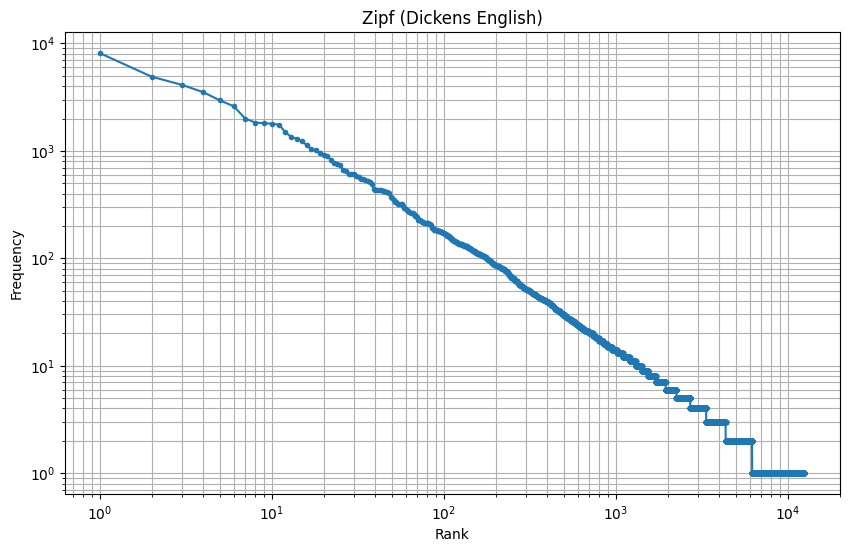

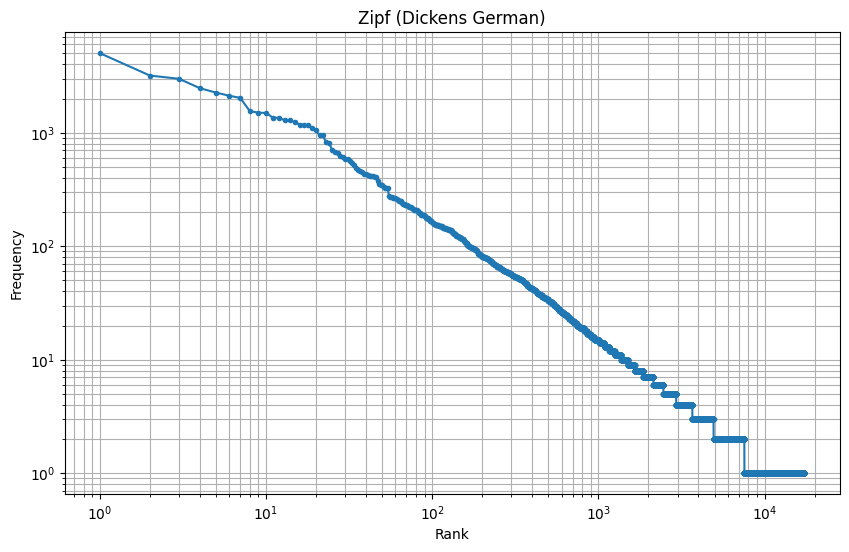

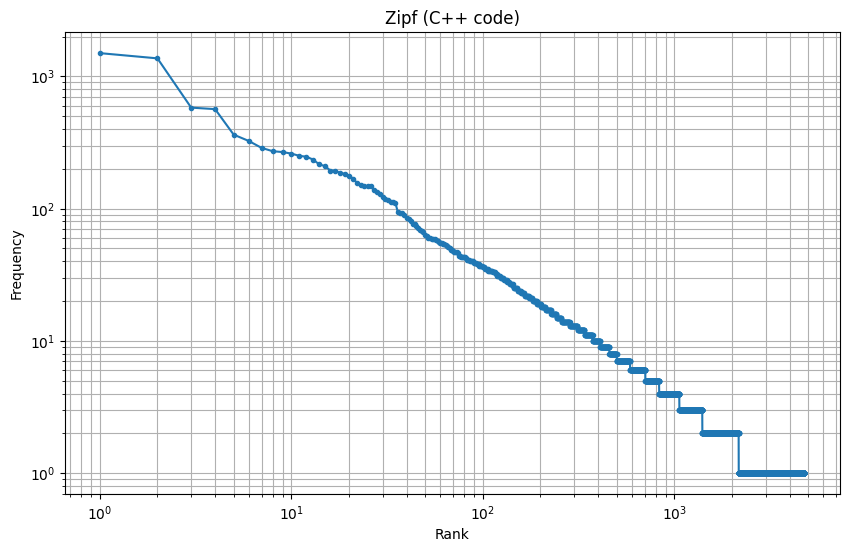

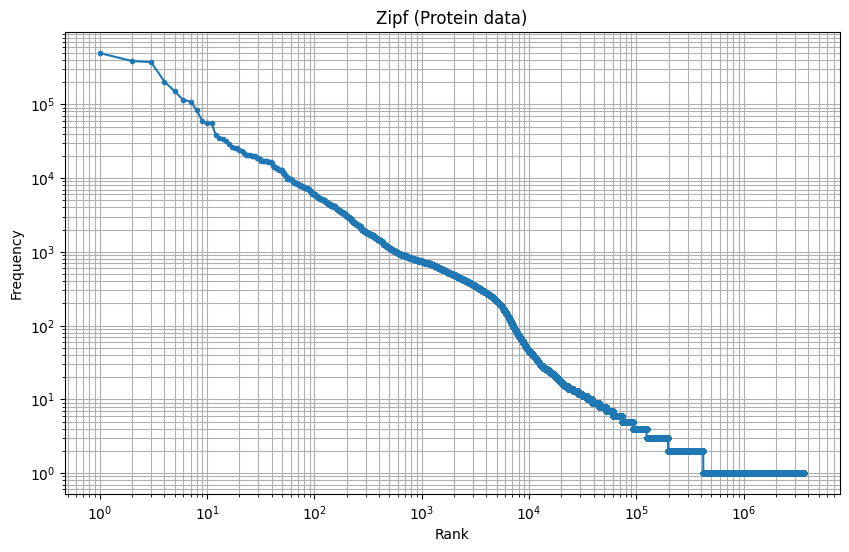

In [41]:
## Driver Code

## Dickens English
zipf_eng = plot_zipf_log(freqs_eng, ranks_eng, "Zipf (Dickens English)")

## Dickens German
zipf_ger = plot_zipf_log(freqs_ger, ranks_ger, "Zipf (Dickens German)")

## C++ code
zipf_py = plot_zipf_log(freqs_py, ranks_py, "Zipf (C++ code)")

## Protein data
zipf_pt = plot_zipf_log(freqs_pt, ranks_pt, "Zipf (Protein data)")

3. Add an 'ideal' line to your 4 plots, according to Zipf's law. Use the following formula. [0.5 pts]

$$\hat{y}_i = \frac{\text{frequency of }word_{rank1}} {\text{rank of } word_i}$$

In [44]:
def calculate_ideal_zipf(ranks, top_freq):
    """
    Calculates predicted frequencies using Zipf's law.

    Args:
        ranks (List[int]): List of word ranks.
        top_freq (int): Frequency of the most common word (rank 1).

    Returns:
        [List[float]: zipf_predictions
    """
    zipf_predictions = [top_freq / rank for rank in ranks]
    return zipf_predictions


def plot_zipf_ideal(freqs, ranks, zipf_preds, title, label_ideal):
    """
    Plot a Zipf plot with an ideal line.
    Args:
        freqs (list): A list of frequencies.
        ranks (list): A list of ranks.
        zipf_preds (list): A list of predicted frequencies.
        title (str): The title of the plot.
        label_ideal (str): Label for the ideal line.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.loglog(ranks, freqs, marker='.', label="Actual Frequency")
    plt.loglog(ranks, zipf_preds, linestyle='--', color='red', label=label_ideal)
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.grid(True, which="both", ls="-")
    plt.legend()
    plt.show()

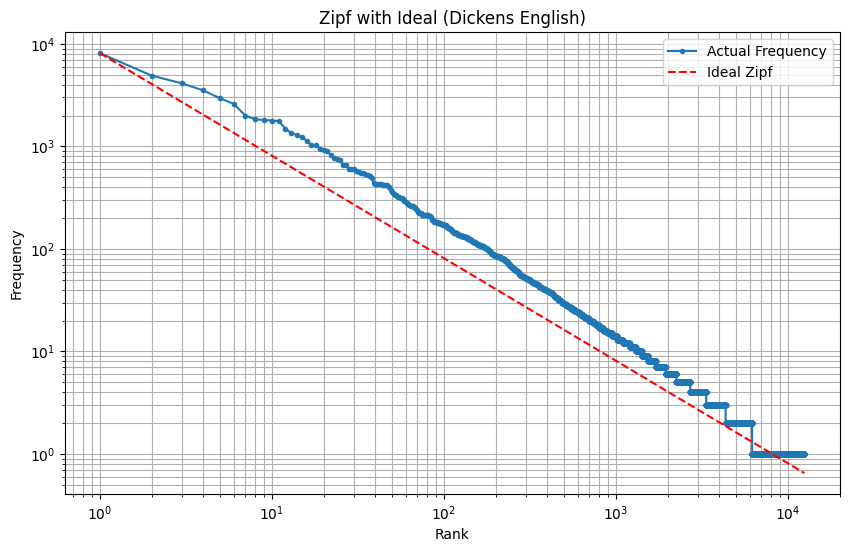

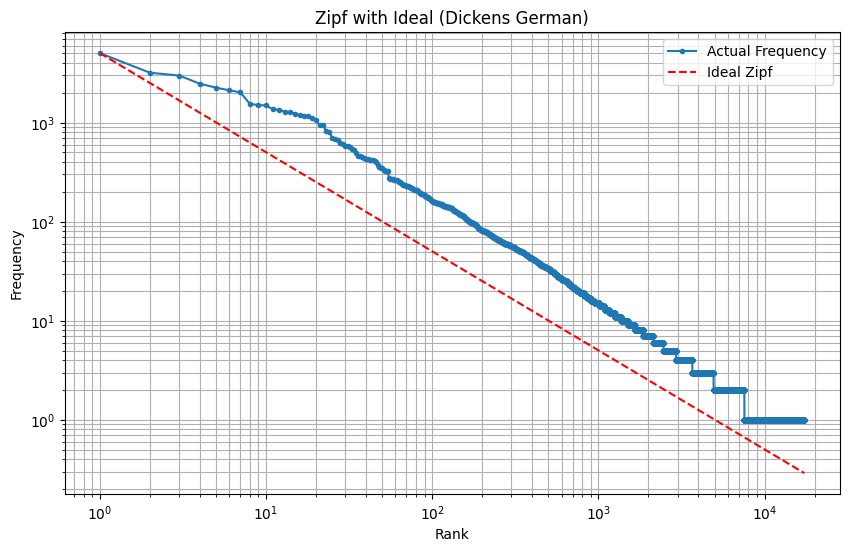

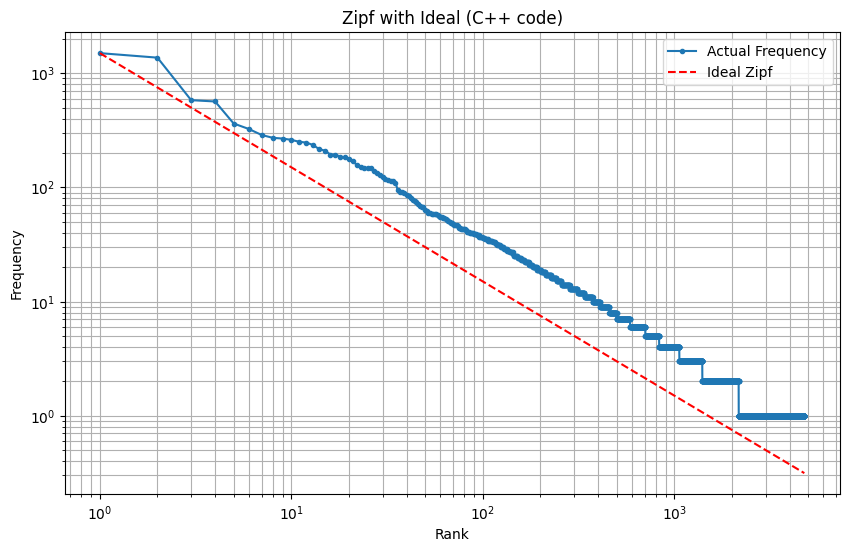

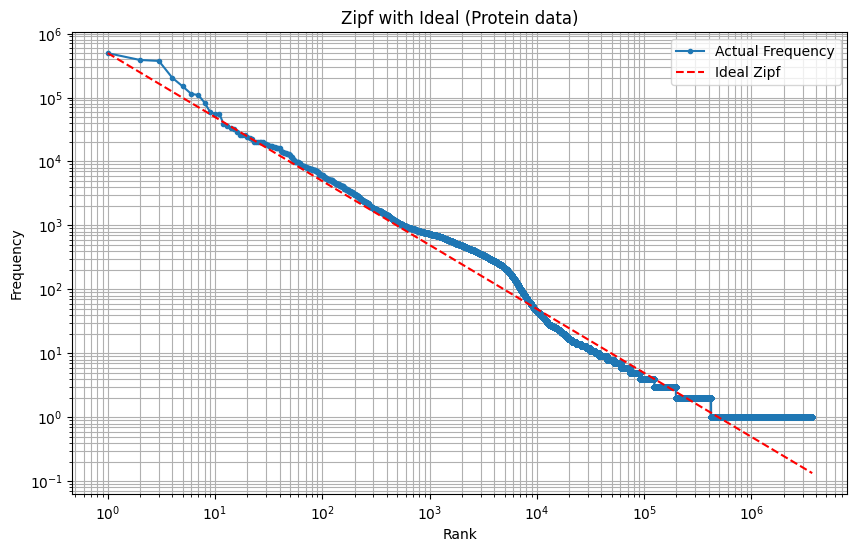

In [45]:
## Driver Code

## Dickens English
top_freq_eng = freqs_eng[0]
zipf_line_eng = calculate_ideal_zipf(ranks_eng, top_freq_eng)
zipf_eng = plot_zipf_ideal(freqs_eng, ranks_eng, zipf_line_eng, "Zipf with Ideal (Dickens English)", "Ideal Zipf")

## Dickens German
top_freq_ger = freqs_ger[0]
zipf_line_ger = calculate_ideal_zipf(ranks_ger, top_freq_ger)
zipf_ger = plot_zipf_ideal(freqs_ger, ranks_ger, zipf_line_ger, "Zipf with Ideal (Dickens German)", "Ideal Zipf")

## C++ code
top_freq_py = freqs_py[0]
zipf_line_py = calculate_ideal_zipf(ranks_py, top_freq_py)
zipf_py = plot_zipf_ideal(freqs_py, ranks_py, zipf_line_py, "Zipf with Ideal (C++ code)", "Ideal Zipf")

## Protein data
top_freq_pt = freqs_pt[0]
zipf_line_pt = calculate_ideal_zipf(ranks_pt, top_freq_pt)
zipf_pt = plot_zipf_ideal(freqs_pt, ranks_pt, zipf_line_pt, "Zipf with Ideal (Protein data)", "Ideal Zipf")

4. Compute the mean squared error (MSE) of these predictions, and output the value to 10 decimal digits. [0.5 pts]

$$ MSE = \big(\frac{1}{n} \sum (\hat{y}_i - y_i)^2\big)$$

In [46]:
def mse(actual, predicted):
    """
    Calculate the Mean Squared Error (MSE) between actual and predicted values.
    Args:
        actual (list): Actual values.
        predicted (list): Predicted values.
    Returns:
        float: Mean Squared Error.
    """
    squared_errors = [(p - a) ** 2 for a, p in zip(actual, predicted)]
    return sum(squared_errors) / len(actual)

In [47]:
## Driver Code

print(f"MSE for Dickens (Eng): ",mse(freqs_eng, zipf_line_eng))   ## Dickens English
print(f"MSE for Dickens (Ger): ",mse(freqs_ger, zipf_line_ger))   ## Dickens German
print(f"MSE for C++ code: ",mse(freqs_py, zipf_line_py))          ## C++ code
print(f"MSE for Proteins: ",mse(freqs_pt, zipf_line_pt))          ## Protein code

MSE for Dickens (Eng):  1639.5610849091115
MSE for Dickens (Ger):  1540.903914275126
MSE for C++ code:  167.61593994246098
MSE for Proteins:  20440.117876481505


5. Add another 'ideal' curve to your 4 plots, but use the Mandelbrot formula instead (lecture slides chapter_2 page 19). You are allowed to play around with the parameters a little bit. Compute the MSE for this as well.                                [0.5 pts]

In [48]:
def calculate_ideal_mandelbrot(ranks, top_freq, a, b):
    """
    Calculates predicted frequencies using Zipf's and Mandelbrot's laws.

    Args:
        ranks (List[int]): List of word ranks.
        top_freq (int): Frequency of the most common word (rank 1).
        a (float): Exponent for Mandelbrot's law.
        b (float): Offset for Mandelbrot's law.

    Returns:
        List[float]: mandelbrot_predictions
    """
    mandelbrot_predictions = [top_freq / (b + rank)**a for rank in ranks]
    return mandelbrot_predictions

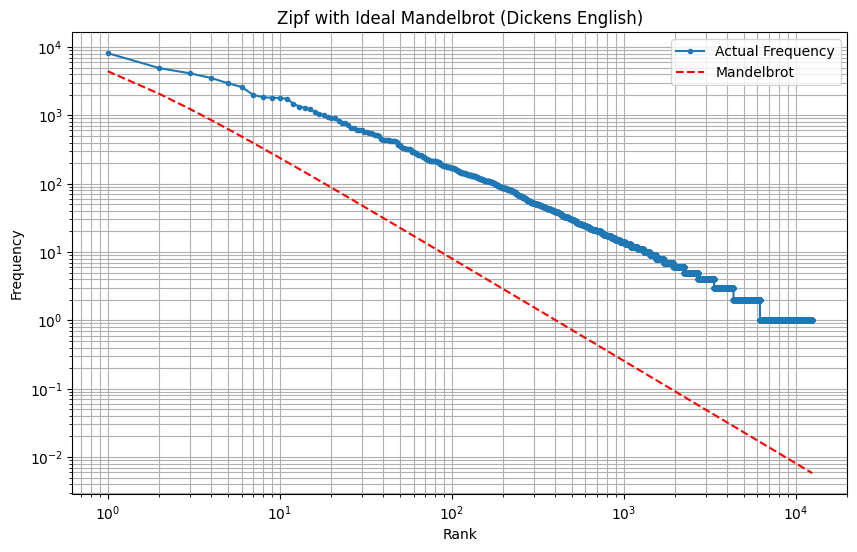

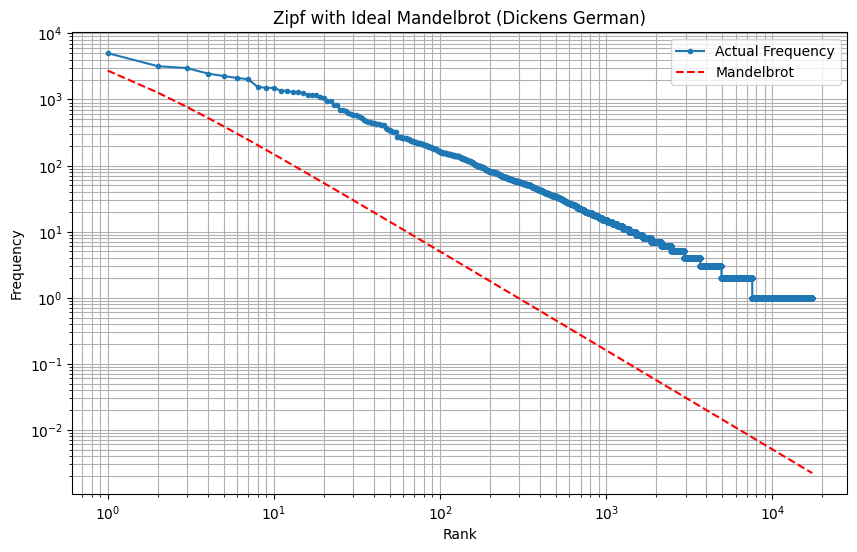

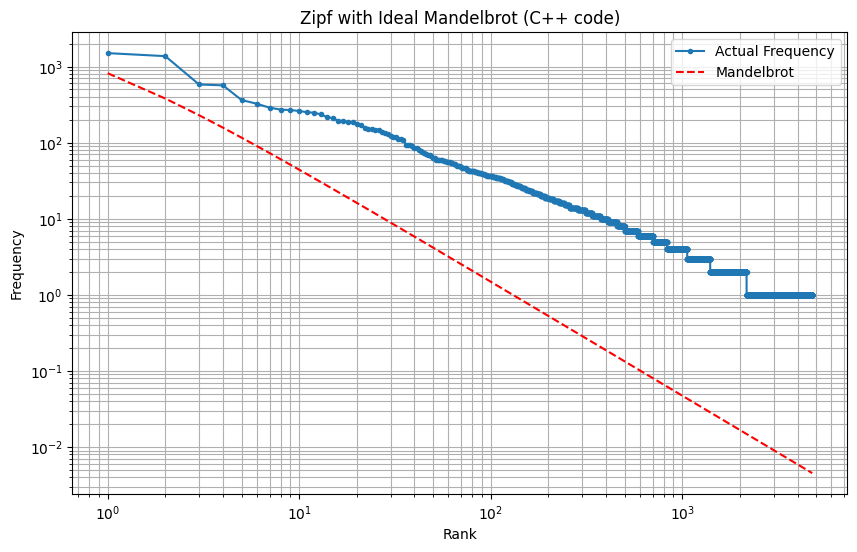

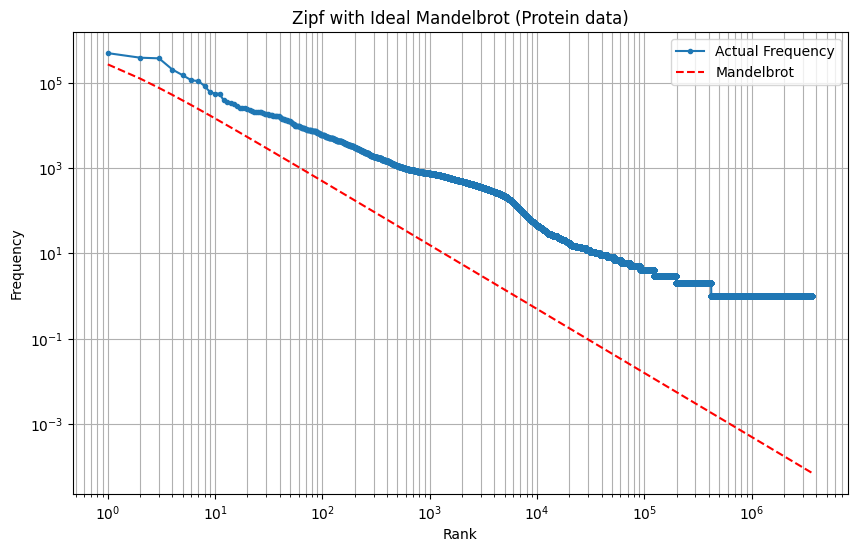

In [49]:
## Driver Code

## Mandelbrot parameters, change these values as you wish
a = 1.5
b = 0.5

## Dickens English
top_freq_eng = freqs_eng[0]
mandelbrot_line_eng = calculate_ideal_mandelbrot(ranks_eng, top_freq_eng, a, b)
zipf_eng = plot_zipf_ideal(freqs_eng, ranks_eng, mandelbrot_line_eng, "Zipf with Ideal Mandelbrot (Dickens English)", label_ideal= "Mandelbrot")

## Dickens German
top_freq_ger = freqs_ger[0]
mandelbrot_line_ger = calculate_ideal_mandelbrot(ranks_ger, top_freq_ger, a, b)
zipf_ger = plot_zipf_ideal(freqs_ger, ranks_ger, mandelbrot_line_ger, "Zipf with Ideal Mandelbrot (Dickens German)", label_ideal= "Mandelbrot")

## C++ code
top_freq_py = freqs_py[0]
mandelbrot_line_py = calculate_ideal_mandelbrot(ranks_py, top_freq_py, a, b)
zipf_py = plot_zipf_ideal(freqs_py, ranks_py, mandelbrot_line_py, "Zipf with Ideal Mandelbrot (C++ code)", label_ideal= "Mandelbrot")

## Protein data
top_freq_pt = freqs_pt[0]
mandelbrot_line_pt = calculate_ideal_mandelbrot(ranks_pt, top_freq_pt, a, b)
zipf_pt = plot_zipf_ideal(freqs_pt, ranks_pt, mandelbrot_line_pt, "Zipf with Ideal Mandelbrot (Protein data)", label_ideal= "Mandelbrot")

In [50]:
## Driver Code

print(f"MSE for Dickens (Eng): ",mse(freqs_eng, mandelbrot_line_eng))   ## Dickens English
print(f"MSE for Dickens (Ger): ",mse(freqs_ger, mandelbrot_line_ger))   ## Dickens German
print(f"MSE for C++ code: ",mse(freqs_py, mandelbrot_line_py))     ## C++ code
print(f"MSE for Proteins: ",mse(freqs_pt, mandelbrot_line_pt))     ## Protein code

MSE for Dickens (Eng):  6552.843168831705
MSE for Dickens (Ger):  3442.055845772993
MSE for C++ code:  613.9125005375996
MSE for Proteins:  77004.17004942417
